#Caso de Estudio: Escalado y Normalización de Variables en el Dataset de Vinos

El objetivo de este caso de estudio es aprender y comprender cómo diferentes técnicas de escalado y normalización afectan a los datos y cómo estas técnicas son fundamentales en el preprocesamiento para modelos de Machine Learning.

##Descripción del Dataset:
El dataset de vinos contiene 13 características químicas de 178 muestras de vino de tres variedades diferentes cultivadas en la región italiana de la misma cultivación.

Las columnas del dataset son las siguientes:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

Consiste en escalar y ajustar las características de un conjunto de datos para que tengan una escala común y estén en un rango específico. Esto ayuda a mejorar el rendimiento y la precisión de los algoritmos de machine learning, ya que evita que características con escalas diferentes dominen sobre otras.

#Técnicas de Escalado y Normalización
##Min-Max Scaling:

Escala los valores de las características a un rango entre 0 y 1.

##Standard Scaling (Z-score normalization):

Transforma las características para que tengan media 0 y desviación estándar 1.

## Robust Scaling:

Utiliza la mediana y los percentiles para escalar, reduciendo la influencia de los valores atípicos.

##Normalizer:
Escala cada fila (en lugar de cada columna) a una longitud unitaria (norma euclidiana igual a 1).

In [ ]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(url, header=None, usecols=[0, 1, 2])
df.columns = ['Label', 'Alcohol', 'MalicAcid']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [ ]:
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Como podemos ver en la tabla anterior, las características **Alcohol**(por ciento/Volumen) y **Malic Acid**(g/l) se miden en escalas diferentes, por lo que el **Escalado de características** es necesario perior importante para cualquier comparación o combinación de estos datos.

## Estandarización y Escalado Min-Max

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_stdScale[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [ ]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [ ]:
print(f"La media usando Standard Scaling: {np.mean(df_stdScale):.2f}")
print(f"La desviación estándar usando Standard Scaling: {np.std(df_stdScale):.2f}")

La media usando Standard Scaling: -0.00
La desviación estándar usando Standard Scaling: 1.00


In [ ]:
print(f"El mínimo del escalado Min-Max: {df_minmax.min():.2f}")
print(f"El máximo del escalado Min-Max: {df_minmax.max():.2f}")
print(f"El promedio del escalado Min-Max: {np.mean(df_minmax):.2f}")
print(f"La desviación estándar del escalado Min-Max: {np.std(df_minmax):.2f}")

El mínimo del escalado Min-Max: 0.00
El máximo del escalado Min-Max: 1.00
El promedio del escalado Min-Max: 0.42
La desviación estándar del escalado Min-Max: 0.24


## Graficando

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    plt.scatter(df['Alcohol'], df['MalicAcid'],
                color='green', label='Scala Original', alpha=0.5)
    plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Estandarización [mean=0, std=1]', alpha=0.3)
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='Escalado min-max [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid en el dataset "Wine"')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

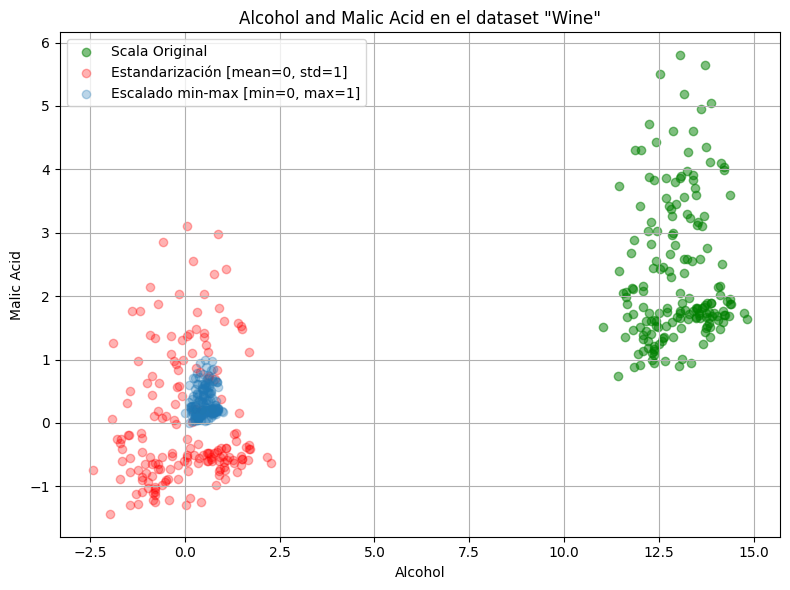

In [ ]:
plot()
plt.show()

El gráfico anterior incluye los puntos de datos del vino en las `3` escalas diferentes:
- **Valores Originales** Escala de entrada original
- **Estandarizado** Usando `sklearn` `StandardScaler`.
- **Escalado mínimo-máximo** Usando `sklearn` `MinMaxScaler`.

En el siguiente Plot haremos zoom en cada una de las `3` escalas para ver la distribución de las etiquetas, deberían tener la misma localización/distribución, pero sólo la diferencia de escala

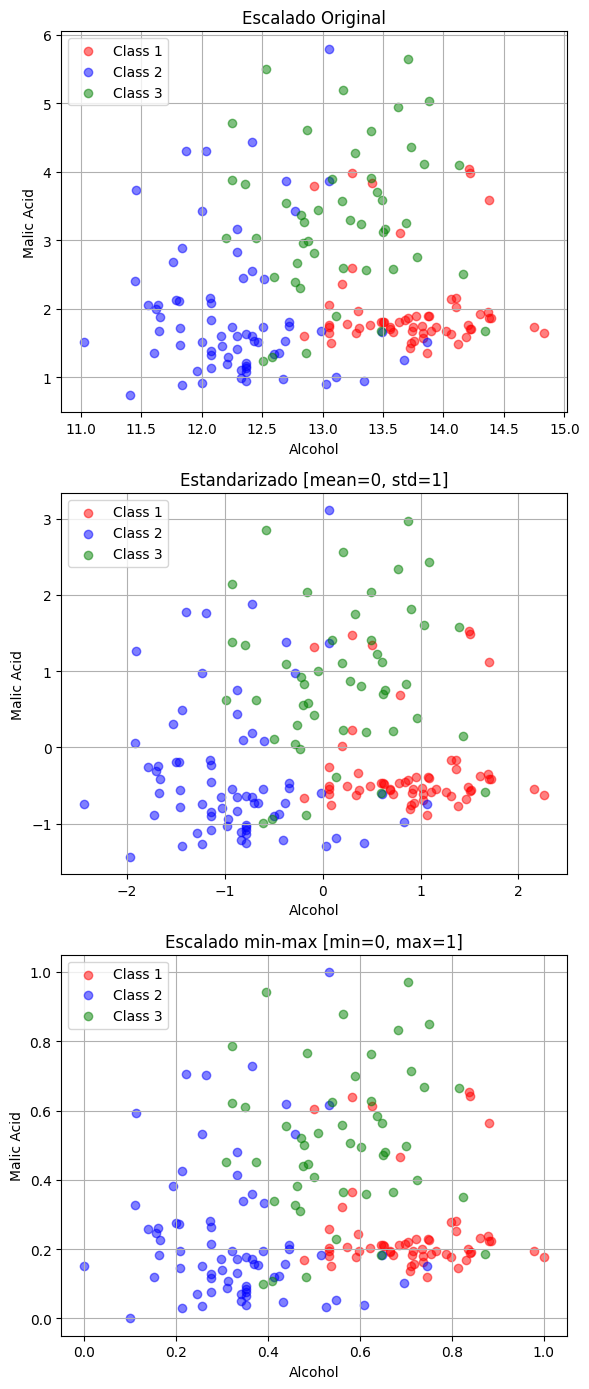

In [ ]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'MalicAcid']].values, df_stdScale, df_minmax),
               ('Escalado Original',
                'Estandarizado [mean=0, std=1]',
                'Escalado min-max [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Label'].values == i, 0],
                  d[df['Label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()

# Más información

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import matplotlib.pyplot as plt

# Cargar el dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
           'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(url, header=None, names=columns)

# Separar las características y la variable de clase
X = df.drop('Class', axis=1)
y = df['Class']

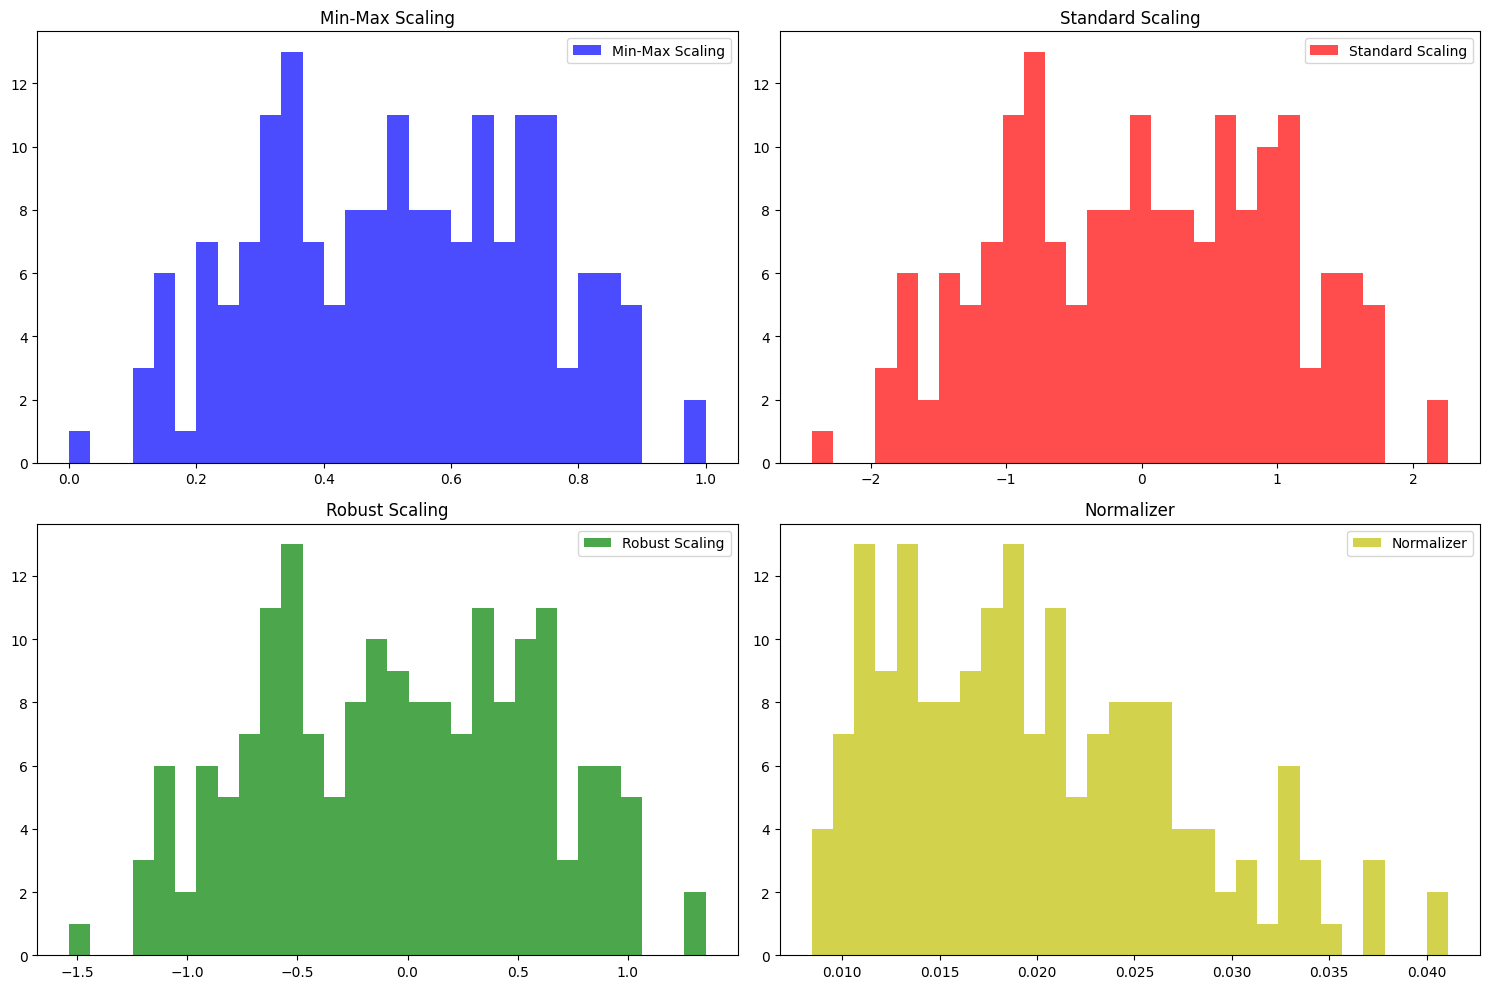

In [ ]:
# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# Aplicar Standard Scaling
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

# Aplicar Robust Scaling
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

# Aplicar Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Visualizar distribuciones antes y después del escalado
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(X_minmax[:, 0], bins=30, color='b', alpha=0.7, label='Min-Max Scaling')
axs[0, 0].set_title('Min-Max Scaling')
axs[0, 0].legend()

axs[0, 1].hist(X_standard[:, 0], bins=30, color='r', alpha=0.7, label='Standard Scaling')
axs[0, 1].set_title('Standard Scaling')
axs[0, 1].legend()

axs[1, 0].hist(X_robust[:, 0], bins=30, color='g', alpha=0.7, label='Robust Scaling')
axs[1, 0].set_title('Robust Scaling')
axs[1, 0].legend()

axs[1, 1].hist(X_normalized[:, 0], bins=30, color='y', alpha=0.7, label='Normalizer')
axs[1, 1].set_title('Normalizer')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

#Insights clave para cada técnica:

##Min-Max Scaling:

* El gráfico muestra cómo los datos se han escalado para estar dentro del rango de 0 a 1. Este tipo de escalado es útil cuando se quiere mantener la forma de la distribución de los datos pero se necesita que todos los valores estén en un rango específico.
* Los picos en los valores más bajos y más altos indican que algunos datos están cerca de los extremos, pero la mayoría se concentra en el centro.

##Standard Scaling (Estandarización):

*En este gráfico, los datos se distribuyen alrededor de una media de 0 con una desviación estándar de 1. Esto es típico de la estandarización, que centra los datos y les da una distribución normal estándar.
*Es útil para algoritmos que suponen que los datos están distribuidos normalmente (como la regresión lineal o SVM).
* Los datos parecen más dispersos en comparación con el escalado Min-Max.

##Robust Scaling:

* Este gráfico utiliza el escalado robusto, que es menos sensible a los valores atípicos (outliers).
* La técnica de escalado robusto usa los percentiles (mediana e IQR) para escalar los datos.
* Observamos que los datos no están tan dispersos como en la estandarización y no se ven tan afectados por posibles outliers, lo que hace a este método adecuado cuando el dataset tiene valores extremos.

##Normalizer (Normalización L2):

* El gráfico muestra los datos normalizados utilizando la norma L2.
* En esta técnica, los valores se transforman de tal manera que la longitud de cada vector de características sea igual a 1.
* La normalización L2 es útil cuando se utilizan algoritmos basados en medidas de distancia, como k-NN o regresión logística.
* En este caso, los valores están más concentrados alrededor de valores bajos, lo que sugiere que esta normalización redistribuye los valores para que tengan una longitud constante.

#Conclusión General
* Cada técnica tiene su aplicación específica y depende del modelo y de la naturaleza de los datos elegir la más adecuada.
* Min-Max Scaling es ideal para redes neuronales o algoritmos que requieren datos en un rango fijo.
* Standard Scaling es más apropiado para modelos lineales y aquellos que asumen una distribución normal.
* Robust Scaling es mejor cuando el dataset tiene outliers.
* Normalizer se utiliza para asegurar que los datos tengan una longitud constante en espacios de alta dimensionalidad.